In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
df = pd.read_csv("/content/Data_yield.csv")
df.sample(5)

,ID,Year,X,Y,NAME_1,NAME_2,Obs_Rice_Area,Obs_Rice_Yield,evi_max,evi_min,...,July_Precipitation,Aug_Tmax,Aug_Tmin,Aug_Precipitation,Sept_Tmax,Sept_Tmin,Sept_Precipitation,Oct_Tmax,Oct_Tmin,Oct_Precipitation
659,766,2021,92,27,Trashigang,Bartsham,61.492982,1811.908026,12565.39075,9965.103442,...,185.115396,27.340239,19.644026,284.937818,26.976961,18.729248,81.166617,26.502491,15.729915,155.397010
565,128,2018,91,27,Sarpang,Jigmichhoeling,533.200000,1509.288260,12774.26333,8010.414632,...,414.861005,25.331460,18.351085,290.942590,25.242602,16.916075,139.543347,22.033225,11.872443,32.907253
226,873,2022,91,27,Monggar,Gongdue,0.390000,9189.743590,13250.81287,9395.127680,...,232.216443,28.680963,21.879202,167.393376,27.884766,20.311275,170.578309,26.359077,16.661051,166.690352
671,153,2018,92,27,Trashigang,Kanglung,55.700000,1628.685996,12677.00212,8337.340475,...,261.666822,25.943490,18.179822,181.944634,25.896706,16.838160,82.135333,22.472307,11.704563,22.410970
665,152,2018,92,27,Trashigang,Bidung,113.950000,1742.619570,12905.33261,7045.499421,...,228.727028,26.132056,18.110349,176.884840,25.880186,16.565946,77.756585,22.369912,11.241051,20.812107


In [ ]:
df.shape

(913, 34)

In [ ]:
df.columns

Index(['ID', 'Year', 'X', 'Y', 'NAME_1', 'NAME_2', 'Obs_Rice_Area',
       'Obs_Rice_Yield', 'evi_max', 'evi_min', 'evi_mean', 'evi_count',
       'evi_stdDev', 'evi_variance', 'slope', 'elevation', 'May_Tmax',
       'May_Tmin', 'May_Precipitation', 'June_Tmax', 'June_Tmin',
       'June_Precipitation', 'July_Tmax', 'July_Tmin', 'July_Precipitation',
       'Aug_Tmax', 'Aug_Tmin', 'Aug_Precipitation', 'Sept_Tmax', 'Sept_Tmin',
       'Sept_Precipitation', 'Oct_Tmax', 'Oct_Tmin', 'Oct_Precipitation'],
      dtype='object')

In [ ]:
df = df.drop("Obs_Rice_Area", axis=1)

In [ ]:
#df = df.drop("Production_", axis=1)

In [ ]:
numerical = df.select_dtypes(include=["int", "float"])

In [ ]:
df_numerical = pd.DataFrame(numerical)
df_numerical.head()

,ID,Year,X,Y,Obs_Rice_Yield,evi_max,evi_min,evi_mean,evi_count,evi_stdDev,...,July_Precipitation,Aug_Tmax,Aug_Tmin,Aug_Precipitation,Sept_Tmax,Sept_Tmin,Sept_Precipitation,Oct_Tmax,Oct_Tmin,Oct_Precipitation
0,821,2022,91,28,16793.152170,13226.82702,6889.660860,10466.19603,13.104032,1959.304452,...,100.016886,13.731611,4.476897,76.152740,12.533074,2.085379,74.541056,10.684446,-2.986780,45.919324
1,616,2021,91,28,1714.470001,12515.61824,8998.825936,10841.41043,4.407903,1322.612421,...,115.722979,13.302864,3.989104,149.417516,12.274395,1.871114,48.987719,12.329681,-1.510479,45.596184
2,1,2018,91,28,1775.000000,13097.42788,7355.621188,10788.46953,9.654219,1872.390875,...,119.262165,12.922930,3.699045,99.723568,12.376478,1.428507,38.884149,8.456682,-4.955404,9.965166
3,411,2020,91,28,1714.000478,12665.98141,7230.824383,10110.30183,6.077894,1920.895664,...,186.649180,13.977701,4.664496,100.339302,13.001918,2.606503,103.030818,12.855059,-0.986551,17.580759
4,206,2019,91,28,1709.950641,12965.09096,7112.787086,10576.58665,8.683145,1947.436967,...,149.806003,14.177511,4.730089,90.028370,12.572865,2.065809,95.717706,11.048022,-2.769033,30.093366


In [ ]:
df_numerical.corr()

,ID,Year,X,Y,Obs_Rice_Yield,evi_max,evi_min,evi_mean,evi_count,evi_stdDev,...,July_Precipitation,Aug_Tmax,Aug_Tmin,Aug_Precipitation,Sept_Tmax,Sept_Tmin,Sept_Precipitation,Oct_Tmax,Oct_Tmin,Oct_Precipitation
ID,1.000000,0.980089,0.047904,-0.015761,0.647389,-0.015608,-0.031908,0.026818,0.106239,-0.013770,...,-0.257771,0.034951,0.040811,0.193075,0.044617,0.076312,-0.001285,0.207324,0.156224,0.557009
Year,0.980089,1.000000,0.004802,0.001505,0.653245,-0.028425,-0.030458,0.023069,0.098840,-0.022096,...,-0.258742,0.008995,0.021373,0.189089,0.018240,0.056978,-0.001414,0.186020,0.139625,0.573668
X,0.047904,0.004802,1.000000,-0.038020,-0.015205,0.162475,0.247983,0.270282,-0.158385,-0.128039,...,-0.250448,0.152832,0.040827,-0.315741,0.144581,0.039581,-0.384450,0.105819,0.034072,-0.113197
Y,-0.015761,0.001505,-0.038020,1.000000,0.075790,0.072600,-0.110139,-0.092627,0.084125,0.157232,...,-0.367759,-0.483115,-0.515679,-0.311111,-0.498582,-0.526273,-0.252401,-0.447923,-0.494935,-0.261499
Obs_Rice_Yield,0.647389,0.653245,-0.015205,0.075790,1.000000,0.218659,-0.372822,-0.137726,0.577245,0.359959,...,-0.361644,-0.070225,-0.070853,-0.143736,-0.083006,-0.079258,-0.080283,-0.089443,-0.091816,0.174475
evi_max,-0.015608,-0.028425,0.162475,0.072600,0.218659,1.000000,0.062422,0.646350,0.479342,0.365856,...,0.054893,0.191089,0.174122,-0.026456,0.159811,0.138458,0.149441,0.081205,0.103712,-0.050624
evi_min,-0.031908,-0.030458,0.247983,-0.110139,-0.372822,0.062422,1.000000,0.759422,-0.629143,-0.880056,...,0.178047,0.096278,0.092063,0.128102,0.113604,0.114791,0.012986,0.183278,0.164967,0.079282
evi_mean,0.026818,0.023069,0.270282,-0.092627,-0.137726,0.646350,0.759422,1.000000,-0.193513,-0.421638,...,0.222226,0.249075,0.242862,0.169417,0.243504,0.240179,0.155433,0.259303,0.263555,0.113260
evi_count,0.106239,0.098840,-0.158385,0.084125,0.577245,0.479342,-0.629143,-0.193513,1.000000,0.666990,...,-0.113820,-0.014006,-0.011129,-0.116382,-0.046013,-0.050978,0.096011,-0.148907,-0.113518,-0.075308
evi_stdDev,-0.013770,-0.022096,-0.128039,0.157232,0.359959,0.365856,-0.880056,-0.421638,0.666990,1.000000,...,-0.140791,-0.000955,-0.009593,-0.137933,-0.029433,-0.043925,0.034265,-0.120539,-0.100468,-0.112607


In [ ]:
cols1 = ['evi_max', 'evi_min', 'evi_mean', 'evi_count','evi_stdDev','evi_variance','slope','elevation','Obs_Rice_Yield']
cols2 = ['May_Tmax',
       'May_Tmin', 'May_Precipitation', 'June_Tmax', 'June_Tmin',
       'June_Precipitation', 'July_Tmax', 'July_Tmin', 'July_Precipitation',
       'Aug_Tmax', 'Aug_Tmin', 'Aug_Precipitation', 'Sept_Tmax', 'Sept_Tmin',
       'Sept_Precipitation', 'Oct_Tmax', 'Oct_Tmin', 'Oct_Precipitation','Obs_Rice_Yield']
df1 = df[cols1]
df2 = df[cols2]

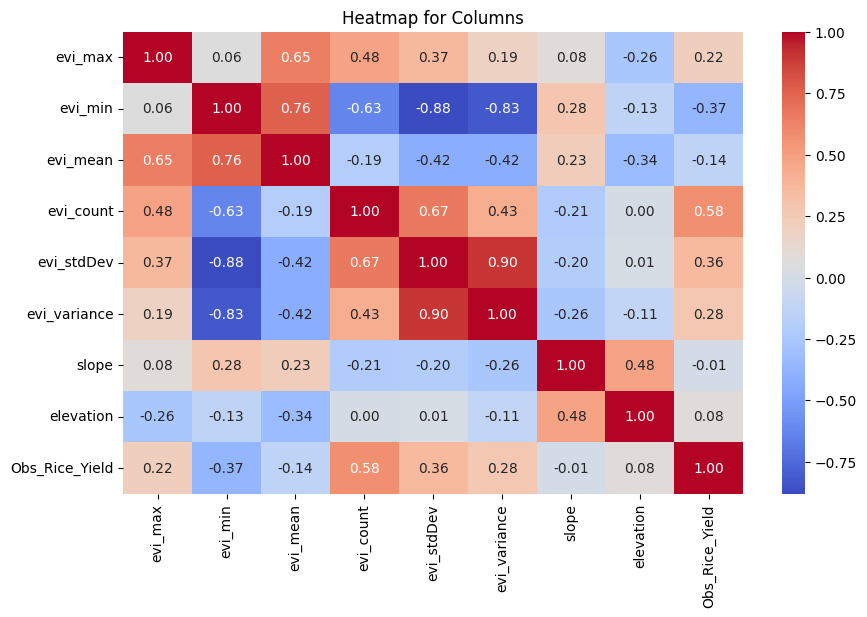

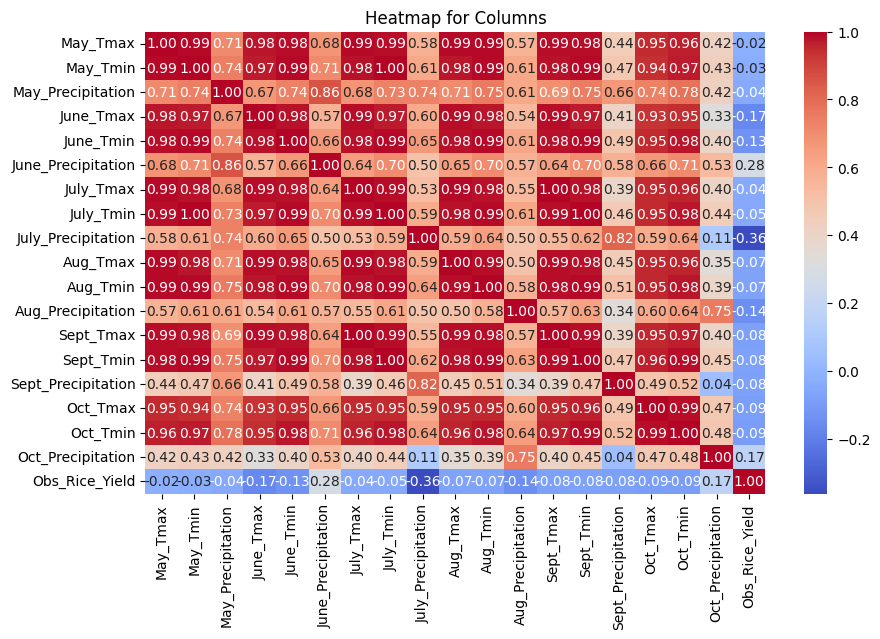

In [ ]:
# Function for creating Heat map:
def create_heatmap(data):
    plt.figure(figsize=(10,6))
    sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Heatmap for Columns')
    plt.show()

create_heatmap(df1)
create_heatmap(df2)

In [ ]:
categorical_features = ['NAME_1','NAME_2']
numerical_features = ['ID', 'Year','X','Y','May_Tmax',
       'May_Tmin', 'May_Precipitation', 'June_Tmax', 'June_Tmin',
       'June_Precipitation', 'July_Tmax', 'July_Tmin', 'July_Precipitation',
       'Aug_Tmax', 'Aug_Tmin', 'Aug_Precipitation', 'Sept_Tmax', 'Sept_Tmin',
       'Sept_Precipitation', 'Oct_Tmax', 'Oct_Tmin', 'Oct_Precipitation','evi_max', 'evi_min', 'evi_mean',
                      'evi_count','evi_stdDev','evi_variance','slope','elevation']


In [ ]:
df_copy = df
df_copy.sample(5)

,ID,Year,X,Y,NAME_1,NAME_2,Obs_Rice_Yield,evi_max,evi_min,evi_mean,...,July_Precipitation,Aug_Tmax,Aug_Tmin,Aug_Precipitation,Sept_Tmax,Sept_Tmin,Sept_Precipitation,Oct_Tmax,Oct_Tmin,Oct_Precipitation
804,386,2019,90,27,Tsirang,Tsholingkhor,1199.979219,12889.42675,8631.127084,10799.051630,...,770.725926,29.916296,23.761005,294.942857,28.433413,21.571587,419.566402,27.405820,18.220344,101.319577
768,789,2021,90,27,Tsirang,Kikorthang,1057.616250,11086.79735,10693.278450,10890.037900,...,398.253304,26.401203,20.162044,614.963109,26.624522,19.630045,108.393372,26.019057,16.520694,238.994674
876,813,2021,91,27,Zhemgang,Bardo,1227.340815,12125.25043,10860.963190,11505.372400,...,265.631494,26.277082,19.255104,441.960636,26.630094,18.890483,70.094436,25.949983,15.556741,203.770486
310,892,2022,89,27,Paro,Shapa,32000.000000,10832.24249,5074.048683,7901.320687,...,145.756083,21.335369,13.516773,193.902243,20.782553,11.968668,199.880418,18.945819,6.854955,92.033191
665,152,2018,92,27,Trashigang,Bidung,1742.619570,12905.33261,7045.499421,10306.984920,...,228.727028,26.132056,18.110349,176.884840,25.880186,16.565946,77.756585,22.369912,11.241051,20.812107


In [ ]:
label_encoder = LabelEncoder()

In [ ]:
df_copy[categorical_features] = df_copy[categorical_features].apply(lambda col: label_encoder.fit_transform(col))

In [ ]:
df_copy.sample(5)

,ID,Year,X,Y,NAME_1,NAME_2,Obs_Rice_Yield,evi_max,evi_min,evi_mean,...,July_Precipitation,Aug_Tmax,Aug_Tmin,Aug_Precipitation,Sept_Tmax,Sept_Tmin,Sept_Precipitation,Oct_Tmax,Oct_Tmin,Oct_Precipitation
8,3,2018,91,28,0,157,1212.930000,13105.37297,7111.560154,10547.31156,...,147.049318,17.254956,8.103067,115.464789,16.801963,6.013297,53.200246,13.113890,-0.177463,13.632747
479,726,2021,89,27,11,107,1400.000000,12302.54144,8974.589519,10790.86605,...,714.016697,24.667085,18.947237,777.609526,25.020553,18.631407,299.734328,25.096890,16.134738,341.083374
812,798,2021,90,27,18,0,2033.000206,11428.71024,10036.888770,10718.48641,...,250.999799,22.889368,15.419870,410.512758,22.546598,14.253111,91.764533,21.964666,10.562517,136.186486
686,156,2018,92,27,15,95,718.699187,12778.38248,8643.519656,10884.20018,...,340.668258,25.555301,17.955950,218.626979,25.374298,16.496264,100.339511,22.142335,11.601119,26.756411
226,873,2022,91,27,6,58,9189.743590,13250.81287,9395.127680,11556.19654,...,232.216443,28.680963,21.879202,167.393376,27.884766,20.311275,170.578309,26.359077,16.661051,166.690352


In [ ]:
X = df_copy.drop(columns=['Obs_Rice_Yield','NAME_1','NAME_2'])
y = df_copy['Obs_Rice_Yield']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create different Regression models:
Linear_regression = LinearRegression()
Ridge_Regression =  Ridge()
Lasso_Regression =  Lasso(alpha = 0.1)
Decision_Tree =  DecisionTreeRegressor()
Random_Forest = RandomForestRegressor()
Gradient_Boosting = GradientBoostingRegressor()
AdaBoost = AdaBoostRegressor()
XGBoost = XGBRegressor()
svr = SVR()

In [ ]:
model_list = [Linear_regression, Ridge_Regression, Lasso_Regression, Decision_Tree, Random_Forest, Gradient_Boosting, AdaBoost, XGBoost, svr]

In [ ]:
model_name = ["Linear regression", "Ridge Regression", "Lasso Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "AdaBoost", "XGBoost", "svr"]

In [ ]:
# Creating list of accuracy of all the models and selecting best model with highest accuracy:
accuracy_list = []
for model in model_list:
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  accuracy = r2_score(y_test, y_pred)
  accuracy_list.append(accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.250e+09, tolerance: 3.036e+06
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Creating dataframe of model with their respective accuracy:
model_df = pd.DataFrame({"Model": model_name, "Accuracy": accuracy_list})
model_df

,Model,Accuracy
0,Linear regression,0.849128
1,Ridge Regression,0.843787
2,Lasso Regression,0.843827
3,Decision Tree,0.850609
4,Random Forest,0.928441
5,Gradient Boosting,0.933890
6,AdaBoost,0.907806
7,XGBoost,0.932960
8,svr,-0.149930


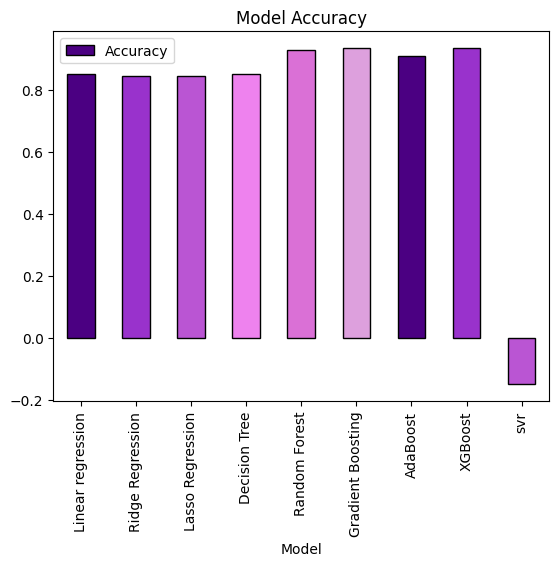

In [ ]:
# MODEL WITH ACCURACY

colors = ["INDIGO", "DARKORCHID", "mediumorchid", "violet", "orchid", "plum"]
model_df.plot.bar(x='Model', y='Accuracy', color = colors, edgecolor ='black')

# Add title
plt.title('Model Accuracy')

# Show plot
plt.show()

In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [ ]:
grid_search_xgb = GridSearchCV(XGBoost, param_grid_xgb, cv=5, verbose=2)
grid_search_xgb.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [ ]:
best_params_xgb = grid_search_xgb.best_params_
print("Best hyperparameters:", best_params_xgb)

Best hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}


In [ ]:
XGBoost = XGBRegressor(learning_rate = 0.2, max_depth = 3, n_estimators = 100)
XGBoost.fit(X_train_scaled, y_train)
final_xgb_y = XGBoost.predict(X_test_scaled)

In [ ]:
final_xgb_accuracy = r2_score(y_test, final_xgb_y)
final_xgb_accuracy

0.9360641103540146

In [ ]:
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
grid_search_gb = GridSearchCV(estimator=Gradient_Boosting, param_grid=param_grid_gb, cv=2)
grid_search_gb.fit(X_train_scaled, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [ ]:
best_params_gb = grid_search_gb.best_params_
print("Best hyperparameters:", best_params_gb)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [ ]:
Gradient_Boosting = GradientBoostingRegressor(learning_rate = 0.2, max_depth = 3, min_samples_leaf = 2,min_samples_split = 10, n_estimators = 200)
Gradient_Boosting.fit(X_train_scaled, y_train)
final_gb_y = Gradient_Boosting.predict(X_test_scaled)

In [ ]:
final_gb_accuracy = r2_score(y_test, final_gb_y)
final_gb_accuracy

0.9289745371812287

In [ ]:
accuracy_scores = [
    0.749976,
    0.758049,
    0.727212,
    0.872531,
    0.832916,
    0.8962464652601693,
    0.774174,
    0.9157052302276633,
    0.823192
]

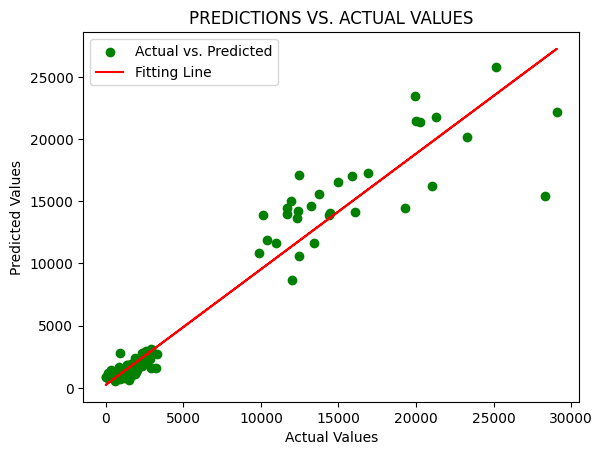

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create scatter plot of actual and predicted values
plt.scatter(y_test, final_xgb_y, color="green", label="Actual vs. Predicted")

# Plotting the line of best fit
z = np.polyfit(y_test, final_xgb_y, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color="red", label="Fitting Line")

# Give x and y labels and title to the plot
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predictions vs. Actual Values".upper())

# Show legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
model_name = ["Linear regression", "Ridge Regression", "Lasso Regression", "Decision Tree", "Random Forest", "Gradient_Boosting", "AdaBoost", "XGBoost", "svr"]

In [ ]:
# CREATING NEW DATAFRAME OF MODEL WITH THEIR RESPECTIVE ACCURACY AFTER HYPERPARAMETER TUNING

model_df1 = pd.DataFrame({"Model": model_name, "Accuracy": accuracy_scores})
model_df1

,Model,Accuracy
0,Linear regression,0.749976
1,Ridge Regression,0.758049
2,Lasso Regression,0.727212
3,Decision Tree,0.872531
4,Random Forest,0.832916
5,Gradient_Boosting,0.896246
6,AdaBoost,0.774174
7,XGBoost,0.915705
8,svr,0.823192


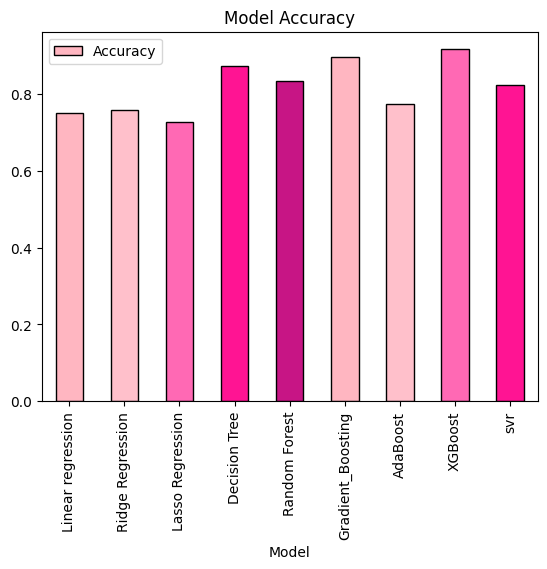

In [ ]:
# MODEL WITH ACCURACY

colors = ['lightpink','pink','hotpink','deeppink','mediumvioletred',]
model_df1.plot.bar(x='Model', y='Accuracy', color = colors, edgecolor = 'black')

# Add title
plt.title('Model Accuracy')

# Show plot
plt.show()


In [ ]:
import pickle
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 7.7 MB/s eta 0:00:00


In [ ]:
pickle.dump(XGBoost, open("Groundnut_xgb.pkl", 'wb'))